<h1> Your Task : </h1> 

- Your task today will be to repeat the pipeline we created on Tuesday aiming to :

    - Create a train, test and validate set, instead of train and test only!
    - Fix the mistake in the earlier practical and make sure we do not replace 0s with NaNs for the number of pregnancies (Pregnancies feature)

<h2 id="read">Reading and examining the data</h2>

- First, let's read the data and get to know it again. The file is called: pima-indians-diabetes.csv

In [256]:
#####Your solution here #####
import pandas as pd

path_to_file ="/Users/babylon/Documents/Teaching/ML/ML2022/Week2/Day4/pima-indians-diabetes.csv"
pima_data = pd.read_csv(path_to_file, encoding='utf-8')

Take a look at the data again (.head() and .describe() if youj'd like) 

In [257]:
pima_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Construct X and y
- Features in X: ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
- Feature in y: "Outcome"

In [258]:
#####Your solution here #####


X_original = pima_data[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
y = pima_data["Outcome"]




- Now replace zeros with NaNs for Glucose, BloodPrssure, SkinThickness, Insulin, BMI

In [259]:

##### Your solution to replace 0s with na for the futures shown here #####

# Save the 'Naned' dataframe in X_nans, for us to be able to have the original
import numpy as np
pregnancies = X_original['Pregnancies']
X_nans = X_original[["Glucose","BloodPressure","SkinThickness",
                     "Insulin","BMI","DiabetesPedigreeFunction","Age"]].replace(0,np.NaN)
X_nans["Pregnancies"] = pregnancies

X_nans.head()
column_names = X_nans.columns

- Now let's plot missingness

<Figure size 720x432 with 0 Axes>

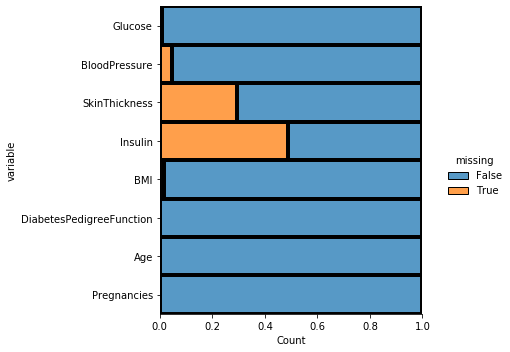

In [260]:
##### Your Solution Here #####
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.displot(
    data=X_nans.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png")

- Now we can scale the data
- You can use StandardScaler in sklearn: 
 - from sklearn.preprocessing import StandardScaler
 - scaler = StandardScaler() 

In [261]:
##### Your solution here#####
# remember: create a variable called X_nans_unsclaed by making a copy of X_nans
# save the column names because scaling will yield an array and we would like to have a dataframe 

X_nans_unscaled = X_nans.copy()
column_names = X_nans_unscaled.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

X_nans = pd.DataFrame(scaler.fit_transform(X_nans), columns = column_names)

column_names

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Pregnancies'],
      dtype='object')

In [262]:
X_nans.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,0.862287,-0.032746,0.558557,NaN,0.165097,0.468492,1.425995,0.639947
1,-1.202229,-0.517645,-0.014657,NaN,-0.846404,-0.365061,-0.190672,-0.844885
2,2.009241,-0.679278,NaN,NaN,-1.323254,0.604397,-0.105584,1.233880
3,-1.071148,-0.517645,-0.587871,-0.518847,-0.629654,-0.920763,-1.041549,-0.844885
4,0.501816,-2.618874,0.558557,0.104968,1.537847,5.484909,-0.020496,-1.141852


- Now impute
    - since we tested different imputation methods prior to this session: 
           - We'll go directly to knn imputation: 
    - To get you started: 
        from sklearn.impute import KNNImputer
        X_knn = X_nans.copy()

In [263]:
##### Your solution for KNN imputation here #####

from sklearn.impute import KNNImputer
X_knn = X_nans.copy()

imputer = KNNImputer(n_neighbors=2)
X_knn_imputed = pd.DataFrame(imputer.fit_transform(X_knn), columns = column_names)
X_knn_imputed.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,0.862287,-0.032746,0.558557,-0.072061,0.165097,0.468492,1.425995,0.639947
1,-1.202229,-0.517645,-0.014657,-0.893978,-0.846404,-0.365061,-0.190672,-0.844885
2,2.009241,-0.679278,0.797396,0.606548,-1.323254,0.604397,-0.105584,1.233880
3,-1.071148,-0.517645,-0.587871,-0.518847,-0.629654,-0.920763,-1.041549,-0.844885
4,0.501816,-2.618874,0.558557,0.104968,1.537847,5.484909,-0.020496,-1.141852


- Now train a RF model to estimate performance using knn-imputed data 
- Remember: we're using train-test-split twice to build: 
    - training set
    - test set
    - validate set
- Because our dataset will be made into even smaller chunks, it is vital to stratify (regardless of what your classifier likes) to make sure that: 
    - The miniority class is represented in all subsets. 
    - so we'll use the stratify option in train_test_split (stratify=y)
- Idea: 
    - split the data into two parts: X_traintest, y_traintest AND X_validate, y_validate
    - Then call train_test_split AGAIN on X_traintest, y_traintest to get: 
        - X_train, y_train
        - X_test, y_test
    - use: stratify = y for all calls to train_test_split
    
- After you split the data: 
    - Create an RF classifier with the default parameters
    - Train it on X_train
    - Output its predictions on X_test

In [273]:
#####Your solution here ###############
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

X_traintest, X_val, y_traintest, y_val = train_test_split(X_knn_imputed, y, 
                                                          test_size = 0.2, random_state = 42, stratify=y)


X_train, X_test, y_train, y_test = train_test_split(X_traintest, y_traintest, 
                                                          test_size = 0.2, random_state = 42, stratify=y_traintest)
#Feed data into Random Forest Algorithm
clf1 = RandomForestClassifier(random_state=42)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)

#Check performance
print(" Classification report of RF using KNN Imputation : ")
print(classification_report(y_test,y_pred))




 Classification report of RF using KNN Imputation : 
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        80
           1       0.68      0.63      0.65        43

    accuracy                           0.76       123
   macro avg       0.74      0.73      0.74       123
weighted avg       0.76      0.76      0.76       123



- Performance not bad at all!!! ( I think it has to do with the number of pregnancies - real apologies for the mistake). 
- Now let's try imbalanced learning techniques. 
- Because my dataset is different, I am going to try all 4 techniques again. To re-cap, they are: 
    - Weighted classification 
    - SMOTE


<h4> Approach 1: Weighted Classification </h4> 

- I'll get you the weights to help  you start: 

In [274]:
from collections import Counter
counter = Counter(y_train)
print(counter)

#class weights
weights = {0:0.5, 1:1.0}
#We've already split the data - no need to do so. 


Counter({0: 320, 1: 171})


In [275]:
### Your solution here ###
#Feed data into Random Forest Algorithm, note the class weight parameter!
clf1 = RandomForestClassifier(class_weight = weights, random_state=42)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)

#Check performance
print(" Classification report of RF using KNN Imputation and class weights : ")
print(classification_report(y_test,y_pred))

 Classification report of RF using KNN Imputation and class weights : 
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        80
           1       0.72      0.60      0.66        43

    accuracy                           0.78       123
   macro avg       0.76      0.74      0.75       123
weighted avg       0.78      0.78      0.78       123



- An improvement - can we do better? let's try other approaches

<h4> Approach 2: Using SMOTE </h4> 


In [276]:
### Your solution here ###
import imblearn
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_smoted, y_train_smoted = oversample.fit_resample(X_train, y_train)

#check the size of the data after SMOTing: 
counter = Counter(y_train_smoted)
print(counter)


Counter({1: 320, 0: 320})


In [277]:
#### Your solution here #####
clf2 = RandomForestClassifier(random_state=42)
clf2.fit(X_train_smoted, y_train_smoted)
y_pred = clf2.predict(X_test)

#Check performance
print(" Classification report of RF using KNN Imputation AND SMOTing : ")
print(classification_report(y_test,y_pred))



 Classification report of RF using KNN Imputation AND SMOTing : 
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        80
           1       0.65      0.74      0.70        43

    accuracy                           0.77       123
   macro avg       0.75      0.77      0.76       123
weighted avg       0.78      0.77      0.78       123



- Good improvement too!

- Now let's cross-validate the approaches 


In [278]:
from sklearn.model_selection import cross_validate
# Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv_def=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scoring=['accuracy','precision_macro','recall_macro']

clf1c = RandomForestClassifier(class_weight = weights, random_state=42)
final_scores1 = cross_validate(clf1c, X_traintest, y_traintest, scoring=scoring, cv=cv_def, n_jobs=-1)

# summarize performance - clf1 using cross validation 
print('Mean Accuracy using weighted classification: %.4f' % np.mean(final_scores1['test_accuracy']))
print('Mean Precision using weighted classification %.4f' % np.mean(final_scores1['test_precision_macro']))
print('Mean Recall using weighted classification %.4f' % np.mean(final_scores1['test_recall_macro']))

# summarize performance - clf2 using SMOTE 
oversample = SMOTE()
X_traintest_smoted, y_traintest_smoted = oversample.fit_resample(X_traintest, y_traintest)
clf2c = RandomForestClassifier(random_state=42)

final_scores2 = cross_validate(clf2c, X_traintest, y_traintest, scoring=scoring, cv=cv_def, n_jobs=-1)

# summarize performance - clf2 using cross validation 
print('Mean Accuracy using SMOTE : %.4f' % np.mean(final_scores2['test_accuracy']))
print('Mean Precision using SMOTE : %.4f' % np.mean(final_scores2['test_precision_macro']))
print('Mean Recall using SMOTE: %.4f' % np.mean(final_scores2['test_recall_macro']))


Mean Accuracy using weighted classification: 0.7665
Mean Precision using weighted classification 0.7488
Mean Recall using weighted classification 0.7201
Mean Accuracy using SMOTE : 0.7682
Mean Precision using SMOTE : 0.7504
Mean Recall using SMOTE: 0.7276


- Both approaches work well. 
- Pick your favourite (or tune the hyperparameters first)!
- Save: 
    - X_knn_imputed and the outcome y - FavouriteData.csv
    - X_validate and y_validate - ValidationData.csv
    - Your favourite classifier (I'll choose clf1) - FavouriteModel.pkl
    - You can what you want with those later on!

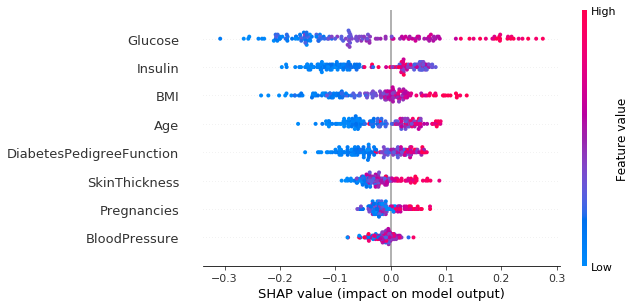

In [280]:

import shap  # package used to calculate Shap values


# Create object that can calculate shap values
explainer = shap.TreeExplainer(clf1)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_val)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1],X_val)

You can do more if you'd like - look at local explanations, etc.. :)